## Preprocessing Labels 

In [1]:
import numpy as np
import pandas as pd
from pytz import timezone

In [3]:
#importing the EsmResponse.csv file which included the ESM responses of all 80 participants
esm_responses = pd.read_csv('/Users/finnschonknecht/Desktop/SubjData/EsmResponse.csv')

In [5]:
#Drop Attention, Duration, Disturbance & Change variables

cols = ['Attention', 'Duration', 'Disturbance' , 'Change']
esm_responses = esm_responses.drop(cols, axis=1)

In [6]:
column_to_check = 'ScheduledTime'

# Filter the DataFrame where A, B, and C are all 0
filtered_df = esm_responses[(esm_responses['Valence'] == 0) & (esm_responses['Arousal'] == 0) & (esm_responses['Stress'] == 0)]

# Count the number of NA values in the specified column
na_count = filtered_df[column_to_check].isna().sum()

print("Number of NA values in", column_to_check, "when Valence, Arousal, and Stress are all 0:", na_count)

Number of NA values in ScheduledTime when Valence, Arousal, and Stress are all 0: 97


In [7]:
esm_responses = esm_responses[~((esm_responses[column_to_check].isna()) & (esm_responses['Valence'] == 0) & (esm_responses['Arousal'] == 0) & (esm_responses['Stress'] == 0))]
# esm_responses = pd.DataFrame(esm_responses)
print("Filtered ESM Responses:")
esm_responses

Filtered ESM Responses:


,Pcode,ResponseTime,ScheduledTime,ReactionTime,Valence,Arousal,Stress
0,P01,1557278103,NaN,NaN,0,0,-1
1,P01,1557278986,1.557279e+09,226.0,-3,3,3
2,P01,1557281772,1.557282e+09,192.0,-3,-2,2
3,P01,1557287138,NaN,NaN,2,-1,0
4,P01,1557291117,NaN,NaN,3,3,-3
...,...,...,...,...,...,...,...
5748,P80,1557125756,1.557126e+09,176.0,1,2,1
5749,P80,1557127903,NaN,NaN,-1,1,2
5750,P80,1557136933,NaN,NaN,1,-1,1
5751,P80,1557139401,1.557139e+09,261.0,0,1,-1


In [8]:
def convert_to_korean_time(df, timestamp_columns):
    # Iterate over each timestamp column
    for column in timestamp_columns:
        # Convert timestamp column to datetime objects
        datetime_objs = pd.to_datetime(df[column], unit='s')

        # Localize datetime objects to UTC timezone and then convert to South Korean timezone
        datetime_korean = datetime_objs.dt.tz_localize('UTC').dt.tz_convert('Asia/Seoul')

        # Replace original column with South Korean time
        df[column] = datetime_korean

    return df

# Example usage:
# Assuming 'timestamp_columns' is a list of column names containing timestamps in your DataFrame
# Replace 'df' with your actual DataFrame
timestamp_columns = ['ResponseTime', 'ScheduledTime']
esm_responses = convert_to_korean_time(esm_responses, timestamp_columns)

/Users/finnschonknecht/anaconda3/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


In [9]:
def calculate_time_differences_in_column(df, timestamp_column):
    time_diff_column = 'Window'
    df[time_diff_column] = (df[timestamp_column].diff().dt.total_seconds()) / 60
    return df

# Example usage:
# Assuming 'timestamp_column' is the name of the column containing timestamps in your DataFrame
# Replace 'df' with your actual DataFrame
timestamp_column = 'ResponseTime'
esm_responses = calculate_time_differences_in_column(esm_responses, timestamp_column)

esm_responses

,Pcode,ResponseTime,ScheduledTime,ReactionTime,Valence,Arousal,Stress,Window
0,P01,2019-05-08 10:15:03+09:00,NaT,NaN,0,0,-1,NaN
1,P01,2019-05-08 10:29:46+09:00,2019-05-08 10:26:00+09:00,226.0,-3,3,3,14.716667
2,P01,2019-05-08 11:16:12+09:00,2019-05-08 11:13:00+09:00,192.0,-3,-2,2,46.433333
3,P01,2019-05-08 12:45:38+09:00,NaT,NaN,2,-1,0,89.433333
4,P01,2019-05-08 13:51:57+09:00,NaT,NaN,3,3,-3,66.316667
...,...,...,...,...,...,...,...,...
5748,P80,2019-05-06 15:55:56+09:00,2019-05-06 15:53:00+09:00,176.0,1,2,1,46.866667
5749,P80,2019-05-06 16:31:43+09:00,NaT,NaN,-1,1,2,35.783333
5750,P80,2019-05-06 19:02:13+09:00,NaT,NaN,1,-1,1,150.500000
5751,P80,2019-05-06 19:43:21+09:00,2019-05-06 19:39:00+09:00,261.0,0,1,-1,41.133333


In [10]:
min_index = esm_responses['Window'].idxmin()
max_index = esm_responses['Window'].idxmax()

print("Index of minimum value:", min_index)
print("Index of maximum value:", max_index)

Index of minimum value: 3852
Index of maximum value: 1962


In [320]:
print(sum(esm_responses.Window > 45))

3702


In [11]:
def remove_participant_data(df, pcodes_to_remove):
    return df[~df['Pcode'].apply(lambda x: x in pcodes_to_remove)]

esm_responses = remove_participant_data(esm_responses, ['P27', 'P59', 'P65'])

In [12]:
esm_responses.set_index(['Pcode'])

,ResponseTime,ScheduledTime,ReactionTime,Valence,Arousal,Stress,Window
Pcode,,,,,,,
P01,2019-05-08 10:15:03+09:00,NaT,NaN,0,0,-1,NaN
P01,2019-05-08 10:29:46+09:00,2019-05-08 10:26:00+09:00,226.0,-3,3,3,14.716667
P01,2019-05-08 11:16:12+09:00,2019-05-08 11:13:00+09:00,192.0,-3,-2,2,46.433333
P01,2019-05-08 12:45:38+09:00,NaT,NaN,2,-1,0,89.433333
P01,2019-05-08 13:51:57+09:00,NaT,NaN,3,3,-3,66.316667
...,...,...,...,...,...,...,...
P80,2019-05-06 15:55:56+09:00,2019-05-06 15:53:00+09:00,176.0,1,2,1,46.866667
P80,2019-05-06 16:31:43+09:00,NaT,NaN,-1,1,2,35.783333
P80,2019-05-06 19:02:13+09:00,NaT,NaN,1,-1,1,150.500000


In [29]:
# seeing what participants to exclude, we set the threshhold as 35 which is 50% of the prompted ESM surveys
def count_rows_per_participant(df):
    return df['Pcode'].value_counts()

participant_row_counts = count_rows_per_participant(esm_responses)

# Print the count of rows for each participant
exclude = participant_row_counts < 35
print(len(exclude))

75


In [14]:
esm_responses = remove_participant_data(esm_responses, ['P22', 'P17'])

In [15]:
def setting_threshold(df, outcomes):
    for outcome in outcomes:
        temp = df.groupby('Pcode')[outcome].describe()
        mean = temp['mean']
    
        for participant, p_xx_mean in mean.items():
            df.loc[df['Pcode'] == participant, f'{outcome}_binary'] = df.loc[df['Pcode'] == participant, outcome].apply(lambda x: 1 if x > p_xx_mean else 0)
    
    return df

In [16]:
setting_threshold(esm_responses, ['Valence', 'Arousal', 'Stress'])

,Pcode,ResponseTime,ScheduledTime,ReactionTime,Valence,Arousal,Stress,Window,Valence_binary,Arousal_binary,Stress_binary
0,P01,2019-05-08 10:15:03+09:00,NaT,NaN,0,0,-1,NaN,0.0,0.0,0.0
1,P01,2019-05-08 10:29:46+09:00,2019-05-08 10:26:00+09:00,226.0,-3,3,3,14.716667,0.0,1.0,1.0
2,P01,2019-05-08 11:16:12+09:00,2019-05-08 11:13:00+09:00,192.0,-3,-2,2,46.433333,0.0,0.0,1.0
3,P01,2019-05-08 12:45:38+09:00,NaT,NaN,2,-1,0,89.433333,0.0,0.0,1.0
4,P01,2019-05-08 13:51:57+09:00,NaT,NaN,3,3,-3,66.316667,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5748,P80,2019-05-06 15:55:56+09:00,2019-05-06 15:53:00+09:00,176.0,1,2,1,46.866667,1.0,1.0,1.0
5749,P80,2019-05-06 16:31:43+09:00,NaT,NaN,-1,1,2,35.783333,0.0,1.0,1.0
5750,P80,2019-05-06 19:02:13+09:00,NaT,NaN,1,-1,1,150.500000,1.0,0.0,1.0
5751,P80,2019-05-06 19:43:21+09:00,2019-05-06 19:39:00+09:00,261.0,0,1,-1,41.133333,0.0,1.0,0.0


In [327]:
def get_label_distribution(df, outcome_columns):
    label_distribution = {}
    for outcome in outcome_columns:
        temp = df.groupby(['Pcode', f'{outcome}']).size().unstack(fill_value=0)
        label_distribution[outcome] = temp
    return label_distribution

# Example usage:
# Replace 'esm_responses' with your actual DataFrame and 'Valence', 'Arousal', 'Stress' with the column name(s) representing the outcome(s)
label_distribution = get_label_distribution(esm_responses, ['Valence_binary', 'Arousal_binary', 'Stress_binary'])

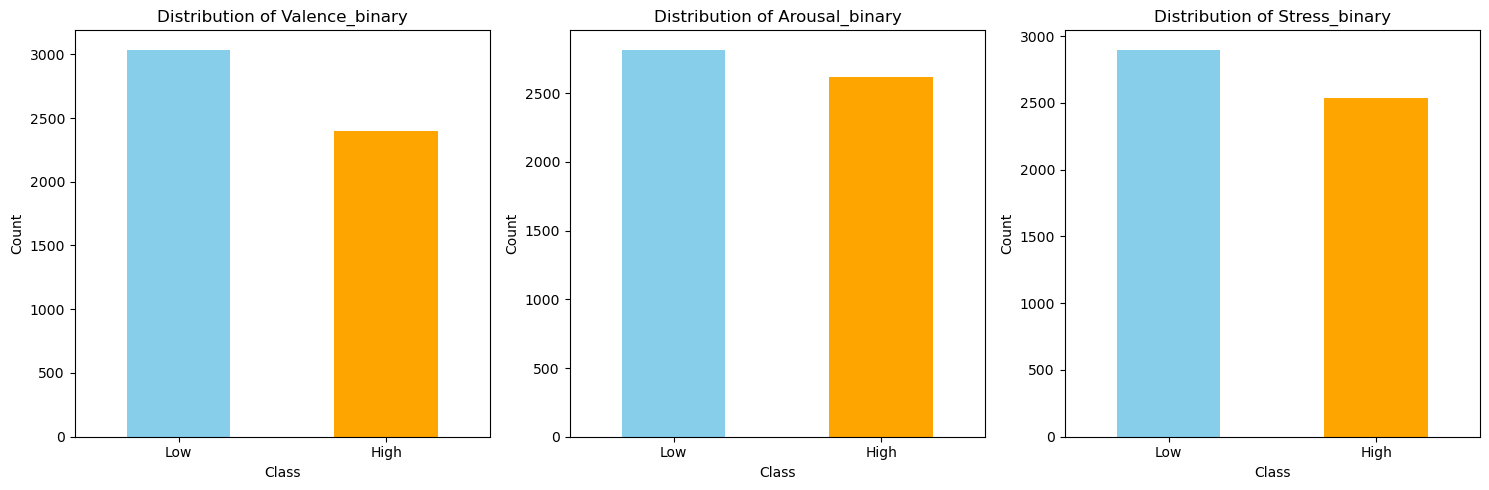

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
#output_dir = '/Users/finnschonknecht/Desktop/k_emo_preprocessing/figs/'

#counts = esm_responses[['Valence_binary', 'Arousal_binary', 'Stress_binary']].apply(pd.Series.value_counts)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through each target variable
for i, target_col in enumerate(['Valence_binary', 'Arousal_binary', 'Stress_binary']):
    # Count the occurrences of each class (0 and 1)
    counts = esm_responses[target_col].value_counts()

    # Plotting
    counts.plot(kind='bar', ax=axs[i], color=['skyblue', 'orange'])
    axs[i].set_title(f'Distribution of {target_col}')
    axs[i].set_xlabel('Class')
    axs[i].set_ylabel('Count')
    axs[i].set_xticklabels(['Low', 'High'], rotation=0)  # Assuming classes are 0 and 1
    #axs[i].legend([target_col])
plt.savefig('binary_target_distribution_personalised.png')

plt.tight_layout()
plt.show()

In [300]:
esm_responses.to_csv('preprocessed_esm_responses.csv', index=False)